In [1]:
import scipy.stats as stat
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools

In [2]:
np.set_printoptions(precision=4)

In [3]:
def print_statistics(data):
    size = np.size(data)
    print(f'Expectation: {np.mean(data)}')
    print(f'Variance: {np.var(data)}')
    print(f'Median: {(data[size // 2 - 1] + data[size // 2]) / 2}')
    print(f'1/4 and 1/3 quantile: {np.quantile(data, 1/4)}, {np.quantile(data, 1/3)}')
    print(f'Corrected variance: {np.var(data) * n / (n - 1)}')
    print(f'Skewness: {stat.kstat(data, 3) / stat.kstat(data, 2) ** 1.5}')
    print(f'Excess: {stat.moment(data, 4) / stat.moment(data, 2) ** 2}')
    print(f'Variation coef: { np.var(data)**0.5 / np.mean(data)}')    

In [4]:
def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return stat.truncnorm( (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [5]:
def generate_poission(n, lambd, a, b):
    poisson = np.random.default_rng().poisson(lambd, n * 5)
    return np.extract(np.logical_and(a <= poisson, poisson <= b), poisson)
def generate_exponential(n, lambd, a, b):
    exp = np.random.default_rng().exponential(lambd, n * 13)
    return np.extract(np.logical_and(a <= exp, exp <= b), exp)
def generate_cauchy(n, shift, sscale, a, b):
    cauchy = stat.cauchy.rvs(loc=shift, scale=sscale, size=n * 50)
    return np.extract(np.logical_and(a <= cauchy, cauchy <= b), cauchy)

In [6]:
def conf_interval_exp(data, alpha, var):
    point_expectation = np.mean(data)
    u_half_alpha = -stat.norm.ppf(alpha / 2)
    
    mu_lower = point_expectation - u_half_alpha * (var / n)**0.5
    mu_higher = point_expectation + u_half_alpha * (var / n)**0.5
    return mu_lower, mu_higher

def conf_interval_var(data, n, alpha):
    s2 = np.var(data) * n / (n - 1)
    df = n - 1
    chi2_half_alpha = stat.chi2.ppf(alpha / 2, df)
    chi2_one_minus_half_alpha = stat.chi2.ppf(1 - alpha / 2, df)

    sigma2_lower = (n - 1) * s2 / chi2_one_minus_half_alpha
    sigma2_higher = (n - 1) * s2 / chi2_half_alpha
    return sigma2_lower, sigma2_higher

def conf_interval_exp_student(data, n, alpha):
    point_expectation = np.mean(data)
    s2 = np.std(data) * n / (n - 1)
    t_half_alpha = -stat.t.ppf(q=alpha / 2, df=n-1)
    
    mu_lower = point_expectation - t_half_alpha * (s2 / n)**0.5
    mu_higher = point_expectation + t_half_alpha * (s2 / n)**0.5
    return mu_lower, mu_higher


In [7]:
def in_range(x, interval):
    a, b = interval
    if a <= x <= b:
        return True
    return False
def pairwise(iterable):
    "s -> (s0, s1), (s1, s2), (s2, s3), ..."
    a, b = itertools.tee(iterable)
    next(b, None)
    return zip(a, b)

def group_data(data, k):
    x0 = math.floor(min(data))
    xn = math.ceil(max(data))
    bounds = [x0 + i * (xn - x0) / k for i in range(k + 1)]
    intervals = list(pairwise(bounds))
    invervals_mids = [(a + b) / 2 for (a, b) in intervals]
    grouped = np.zeros(np.size(data))
    for i in range(np.size(data)):
        entry_group = [j for j in range(k) if in_range(data[i], intervals[j])][0]
        grouped[i] = invervals_mids[entry_group]
    
    _, counts = np.unique(grouped, return_counts=True)
    scaled_counts = [x  for x in counts]
    plt.bar(invervals_mids, [x for x in scaled_counts], 
            width = bounds[1] - bounds[0],
            edgecolor='red')
    plt.show()
    return grouped

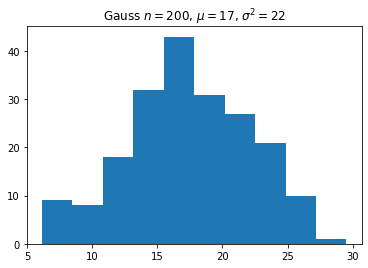

Expectation: 17.40551060169761
Variance: 21.849614763152264
Median: 21.745031523079792
1/4 and 1/3 quantile: 14.378719834854465, 15.48488702897162
Corrected variance: 21.95941182226358
Skewness: -0.06688845613501593
Excess: 2.643579495992597
Variation coef: 0.2685561634293894


In [8]:
n = 200
a = 5
b = 7
gauss_exp = 17
gauss_var = 22
# gauss = get_truncated_normal(gauss_exp, gauss_var**0.5, a, b) # 2nd param is standard deviation, not variance
gauss_sample = stat.norm.rvs(loc=gauss_exp, scale=gauss_var**0.5,size=n)
plt.hist(gauss_sample)
plt.title(f'Gauss $n = {n}$, $\mu = {gauss_exp}$, $\sigma^2 = {gauss_var}$')
plt.show()
print_statistics(gauss_sample)

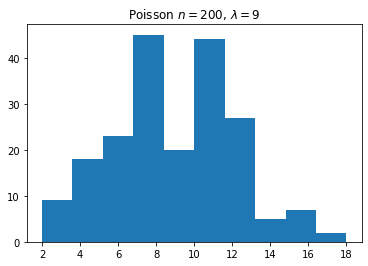

Expectation: 8.88
Variance: 9.9156
Median: 6.0
1/4 and 1/3 quantile: 6.75, 7.0
Corrected variance: 9.965427135678391
Skewness: 0.17623711726102465
Excess: 2.7229141266826686
Variation coef: 0.3546063706570187


In [9]:
poission_param = 9
# poisson = generate_poission(n, poission_param, a, b)[:n]
poisson = np.random.default_rng().poisson(poission_param, n)
plt.hist(poisson)
plt.title(f'Poisson $n = {n}$, $\lambda = {poission_param}$')
plt.show()
print_statistics(poisson)

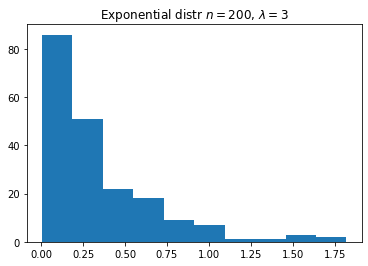

Expectation: 0.33307423093486266
Variance: 0.11571057152193617
Median: 0.07835594345325136
1/4 and 1/3 quantile: 0.08782447173424861, 0.12731690067716428
Corrected variance: 0.11629203168033786
Skewness: 1.875793255215516
Excess: 6.966534637298142
Variation coef: 1.0212815484408333


In [10]:
exp_param = 3
# exp = generate_exponential(n, 3, a, b)[:n]
exp = np.random.default_rng().exponential(1 / exp_param, n)
plt.hist(exp)
plt.title(f'Exponential distr $n = {n}$, $\lambda = {exp_param}$')
plt.show()
print_statistics(exp)

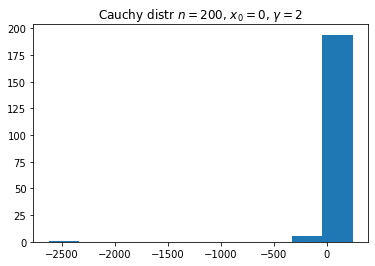

Expectation: -12.995156206008021
Variance: 35305.64616869979
Median: 6.570895241974872
1/4 and 1/3 quantile: -1.8623873170109164, -0.8694000500288362
Corrected variance: 35483.0614760802
Skewness: -13.540195388474116
Excess: 186.9893733496602
Variation coef: -14.459077248703641


In [11]:
cauchy_shift = 0
cauchy_scale = 2
# cauchy = generate_cauchy(n, cauchy_shift, cauchy_scale, a, b)[:n]
cauchy = stat.cauchy.rvs(loc=cauchy_shift, scale = cauchy_scale, size=n)
plt.hist(cauchy)
plt.title(f'Cauchy distr $n = {n}$, $x_0 = {cauchy_shift}$, $\gamma = {cauchy_scale}$')
plt.show()
print_statistics(cauchy)

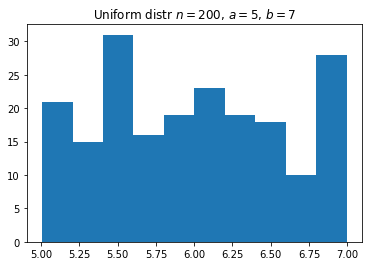

Expectation: 5.988707583453897
Variance: 0.34188927874155767
Median: 5.376858086143265
1/4 and 1/3 quantile: 5.48878449210495, 5.606073316320278
Corrected variance: 0.3436073153181484
Skewness: 0.12781430166171107
Excess: 1.8578060928672615
Variation coef: 0.09763592230857795


In [12]:
uniform = np.random.default_rng().uniform(low=a, high=b, size=n)
plt.hist(uniform)
plt.title(f'Uniform distr $n = {n}$, $a = {a}$, $b = {b}$')
plt.show()
print_statistics(uniform)


# Interval estimation for gauss expectation and variance

In [13]:
alpha = 0.05

In [14]:
gauss_exp = 4
gauss_var = 9

# 2nd param is standard deviation, not variance
# gauss_sample = get_truncated_normal(gauss_exp, gauss_var**0.5, a, b).rvs(size=n) 
gauss_sample = stat.norm.rvs(loc=gauss_exp, scale=gauss_var**0.5,size=n)


mu_lower, mu_higher = conf_interval_exp(gauss_sample, alpha, gauss_var)
print(f"error: {alpha}")
print(f"point estimation: {np.mean(gauss_sample)}")
print("confidence interval for expectation w/ actual sigma")
print(f'lower bound for expectation: {mu_lower}')
print(f'higher bound for expectation: {mu_higher}')

error: 0.05
point estimation: 3.9873102372982805
confidence interval for expectation w/ actual sigma
lower bound for expectation: 3.571539089993377
higher bound for expectation: 4.403081384603184


In [15]:
sigma2_lower, sigma2_higher = conf_interval_var(gauss_sample, n, alpha) 

print(f"point estimation: {np.var(gauss_sample)}")
print(f'lower bound for variance: {sigma2_lower}')
print(f'higher bound for variance: {sigma2_higher}')

point estimation: 8.616632971189093
lower bound for variance: 7.181733952604722
higher bound for variance: 10.649244570608339


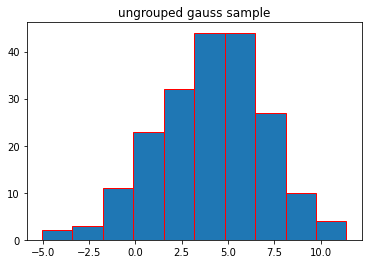

In [16]:
plt.hist(gauss_sample, edgecolor = 'red')
plt.title("ungrouped gauss sample")
plt.show()

# Grouped gauss confidence intervals

grouped gauss sample, k = 8


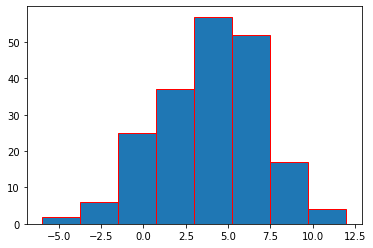

point estimation: 3.95625
lower bound for expectation: 3.5404788526950965
higher bound for expectation: 4.3720211473049035

point estimation: 9.5649609375
lower bound for variance: 7.972140040067416
higher bound for variance: 11.821277368124468


In [17]:
k = 8
print(f'grouped gauss sample, k = {k}')
grouped = group_data(gauss_sample, k)

mu_lower_group, mu_higher_group = conf_interval_exp(grouped, alpha, gauss_var)
print(f"point estimation: {np.mean(grouped)}")
print(f'lower bound for expectation: {mu_lower_group}')
print(f'higher bound for expectation: {mu_higher_group}\n')

sigma2_lower_group, sigma2_higher_group = conf_interval_var(grouped, n, alpha) 
print(f"point estimation: {np.var(grouped)}")
print(f'lower bound for variance: {sigma2_lower_group}')
print(f'higher bound for variance: {sigma2_higher_group}')

#  Expectation confidence interval w/ student's quantiles

In [18]:
mu_lower_student, mu_higher_student = conf_interval_exp_student(gauss_sample, n, alpha)
print("gauss expectation with no known variance")
print(f'lower bound for expectation: {mu_lower_student}')
print(f'higher bound for variance: {mu_higher_student}')

print("\ngrouped gauss expectation w/ actual variance")
print(f"point estimation: {np.mean(grouped)}")
print(f'lower bound for expectation: {mu_lower_group}')
print(f'higher bound for expectation: {mu_higher_group}\n')

print("\nungrouped gauss expectation w/ actual variance")
print(f"point estimation: {np.mean(gauss_sample)}")
print(f'lower bound for expectation: {mu_lower}')
print(f'higher bound for expectation: {mu_higher}\n')


gauss expectation with no known variance
lower bound for expectation: 3.7478104121891476
higher bound for variance: 4.226810062407413

grouped gauss expectation w/ actual variance
point estimation: 3.95625
lower bound for expectation: 3.5404788526950965
higher bound for expectation: 4.3720211473049035


ungrouped gauss expectation w/ actual variance
point estimation: 3.9873102372982805
lower bound for expectation: 3.571539089993377
higher bound for expectation: 4.403081384603184

